In [1]:
#Load libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
def show_scatterplot(X, colors, title=''):
    colors = colors.cpu().numpy()
    X = X.cpu().numpy()
    plt.figure()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    # plt.grid(True)
    plt.title(title)
    plt.axis('off')

def plot_bases(bases, width=0.04):
    bases = bases.cpu()
    bases[2:] -= bases[:2]
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)

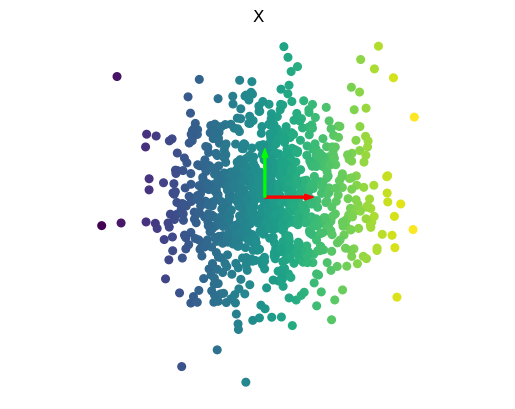

In [4]:
#Generate some points in 2D space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:,0]

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)

## Visualising Linear Transformations

* Generate a random matrix $W$
$$
W = U \begin{bmatrix}
    s_1 & 0 \\
    0 & s_2 \\
    \end{bmatrix}
    V^T
$$

* Compute $ y = Wx $
* Large singular values stretch the points
* Smaller singular values push them together
* $U$, $V$ rotate/reflect

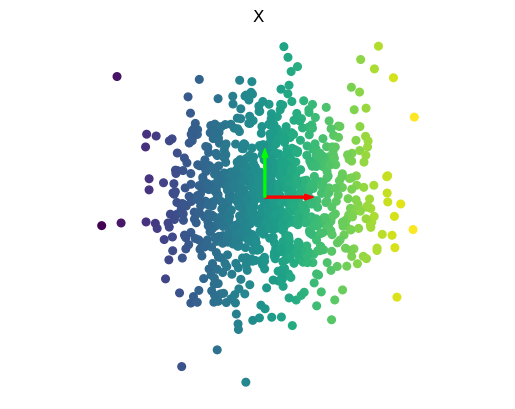

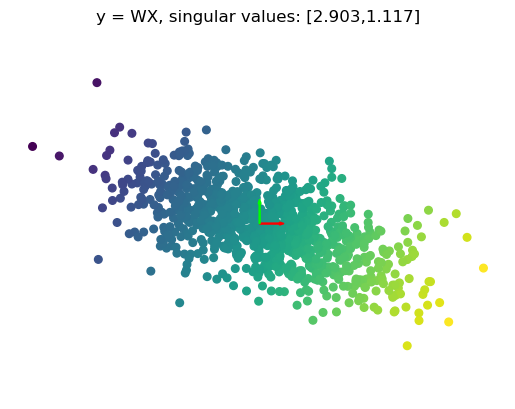

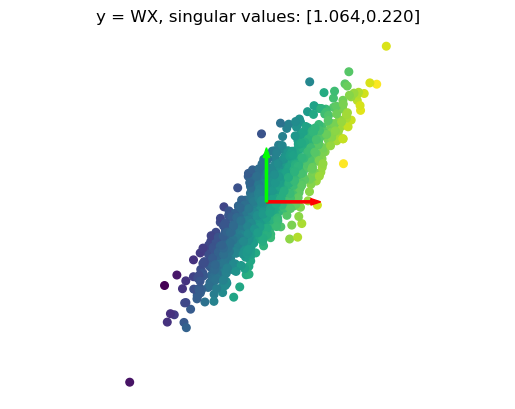

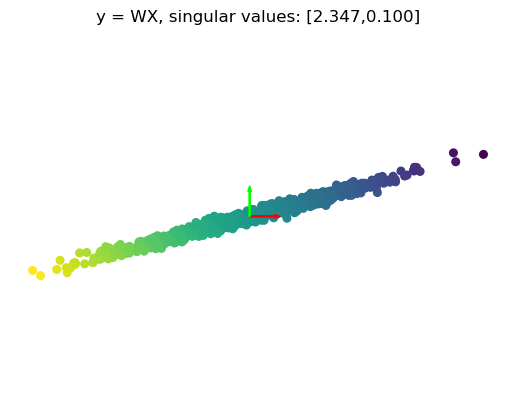

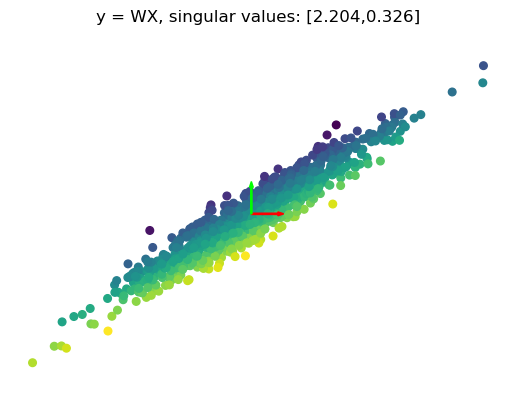

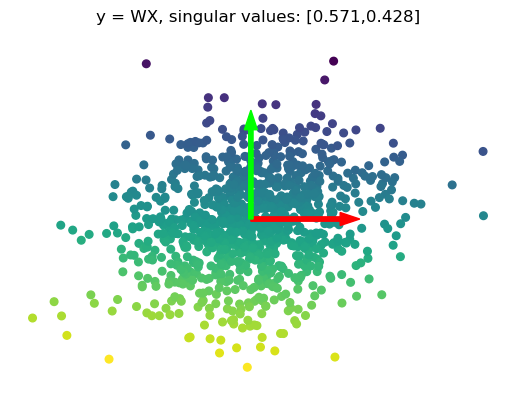

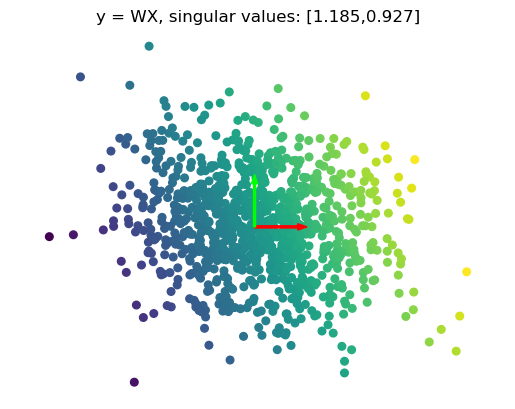

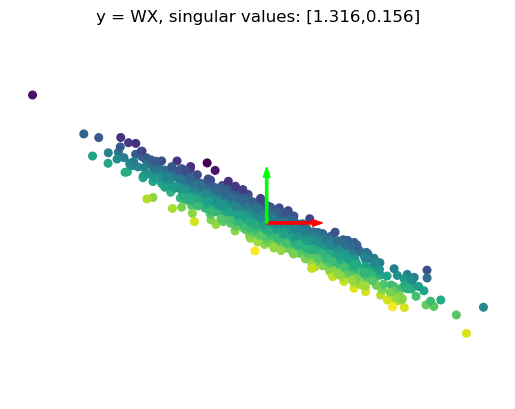

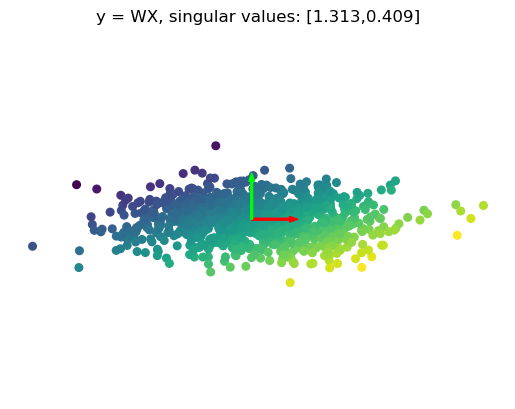

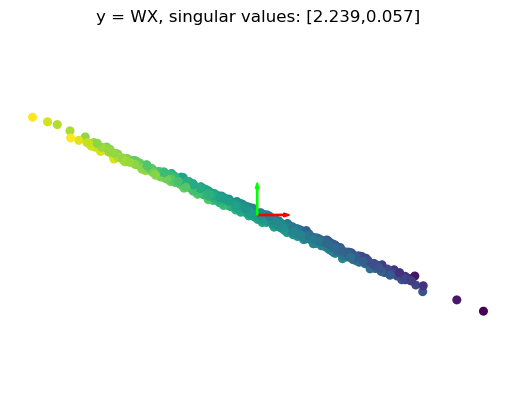

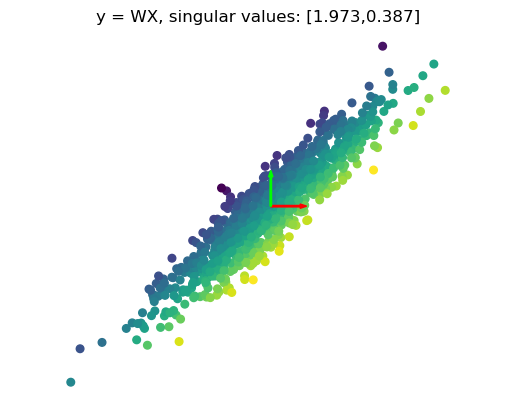

In [5]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

for i in range(10):
    #Create a random matrix
    W = torch.randn(2, 2).to(device)
    #transform points
    Y = X @ W.t()
    #compute singular values
    U, S, V = torch.svd(W)
    #plot transformed points
    show_scatterplot(Y, colors, title='y = WX, singular values: [{:.3f},{:.3f}]'.format(S[0], S[1]))
    # transform the basis
    new_OI = OI @ W.t()
    #plot old and new basis
    plot_bases(OI)

## Linear transformation with PyTorch

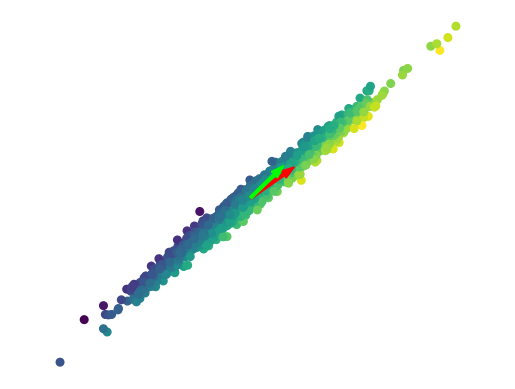

In [6]:
model = nn.Sequential(nn.Linear(2, 2, bias=False))
model.to(device)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(model(OI))

## Non linear Transform: Map points to a Square

* Linear transforms can rotate, reflect, stretch and compress, but cannot curve
* We need non-linearities for this
* Can (approximately) map points to a square by first stretching out by a factor , then squashing with a tanh function

$$
f(x) = tanh\left\{\begin{bmatrix}
            s & 0 \\
            0 & s\\
            \end{bmatrix}
            x\right\}
$$

Text(0.5, 1.0, 'tanh() non linearity')

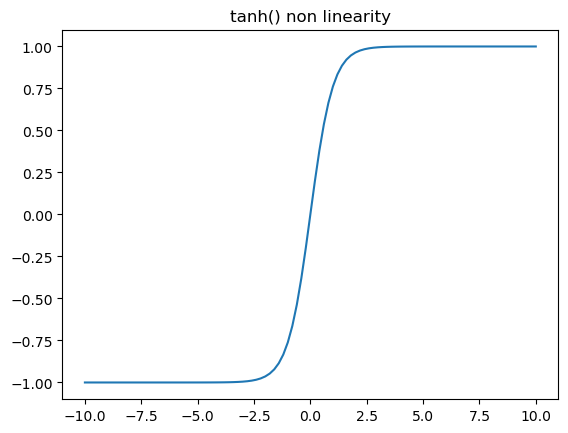

In [9]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plt.plot(z.numpy(), s.numpy())
plt.title("tanh() non linearity")

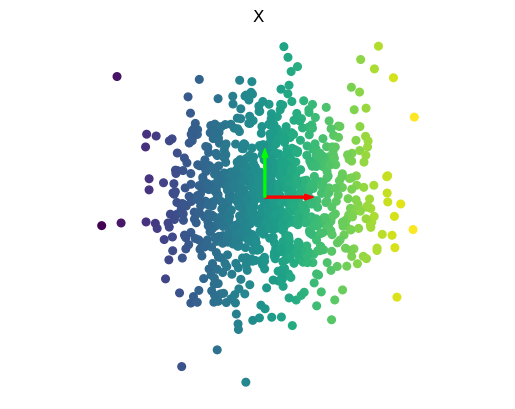

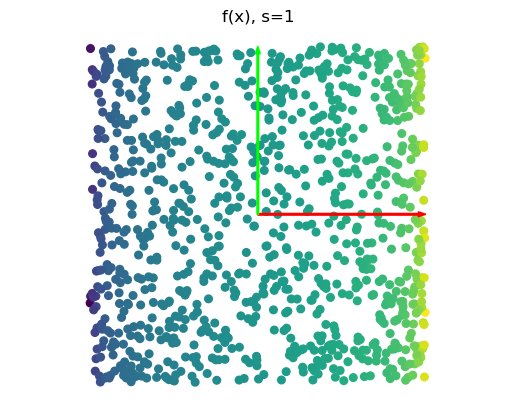

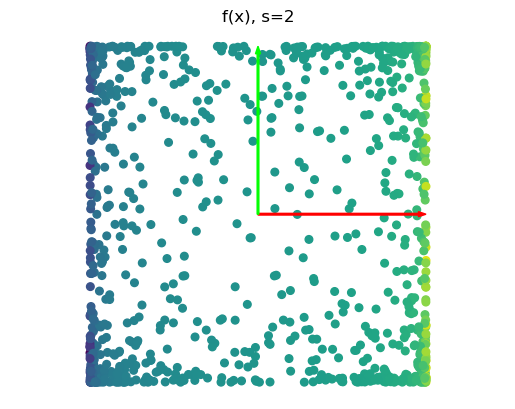

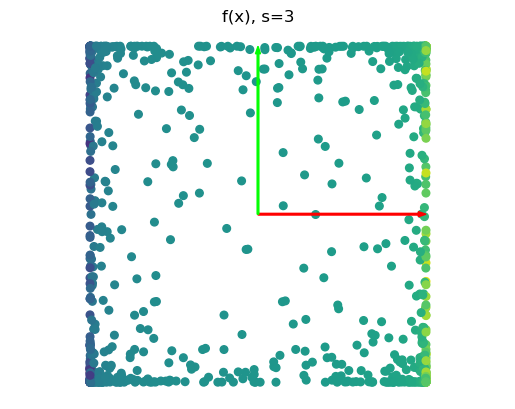

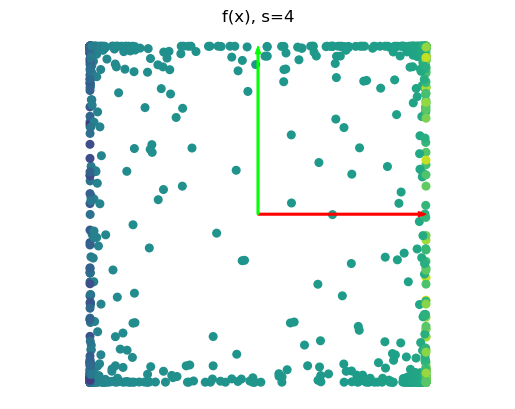

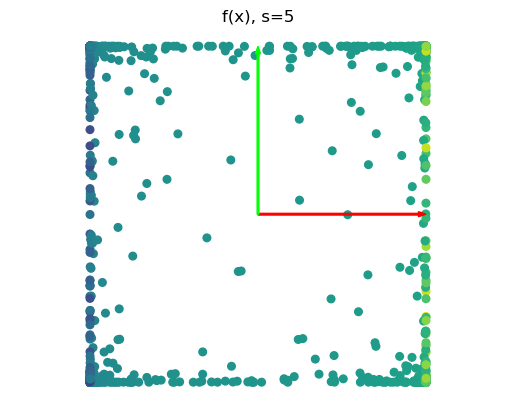

In [10]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(nn.Linear(2, 2, bias=False),
                     nn.Tanh())
model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

## Visualize Functions Represented by Random Neural Networks

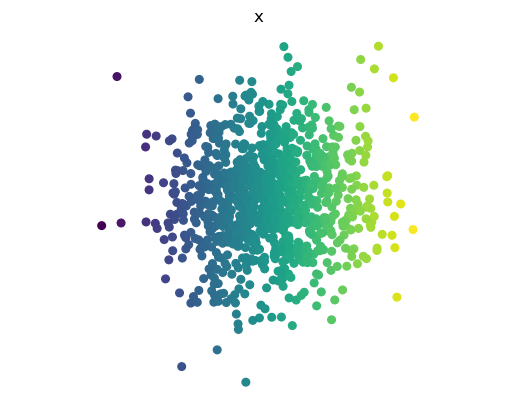

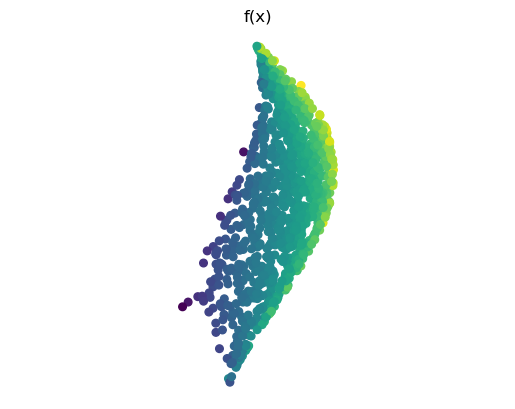

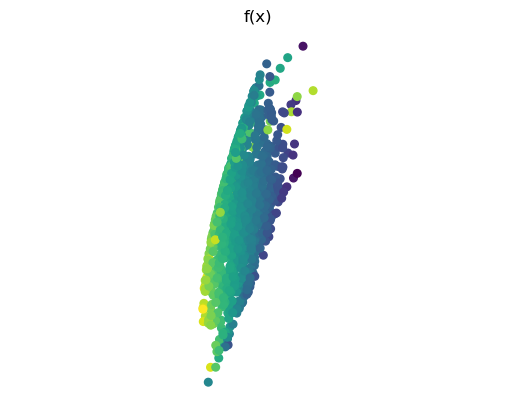

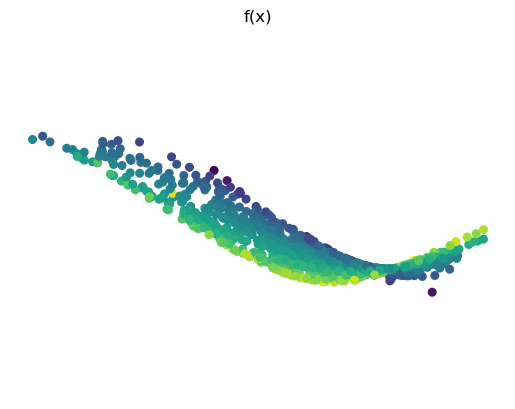

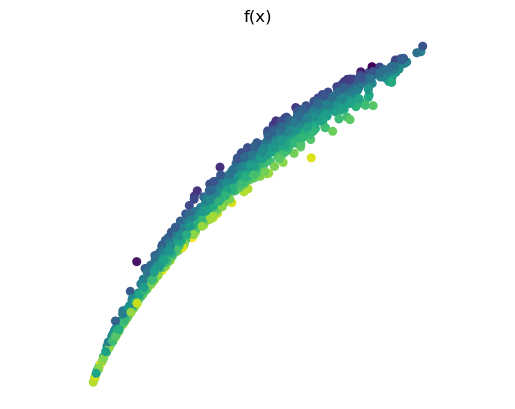

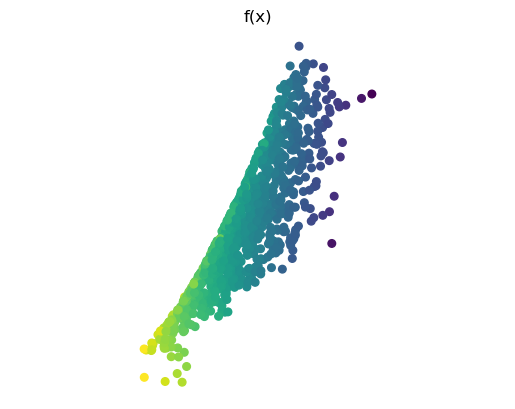

In [11]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(nn.Linear(2, n_hidden),
                         NL,
                         nn.Linear(n_hidden, 2))
    model.to(device)
    
    with torch.no_grad():
        Y = model(X)
        show_scatterplot(Y, colors, title='f(x)')

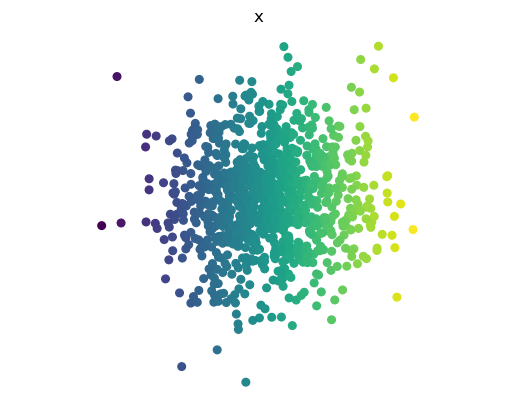

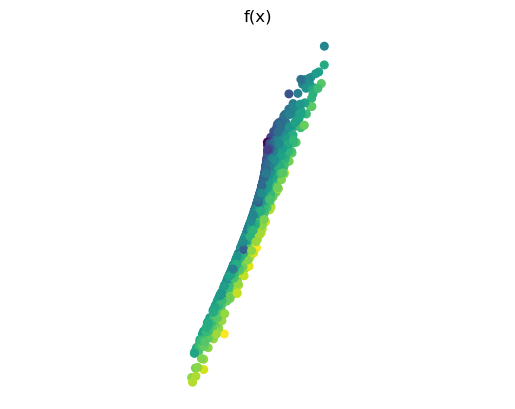

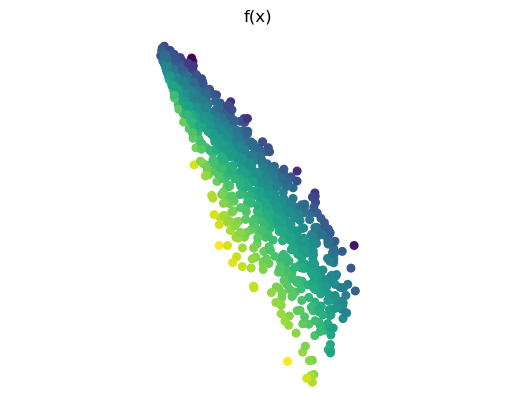

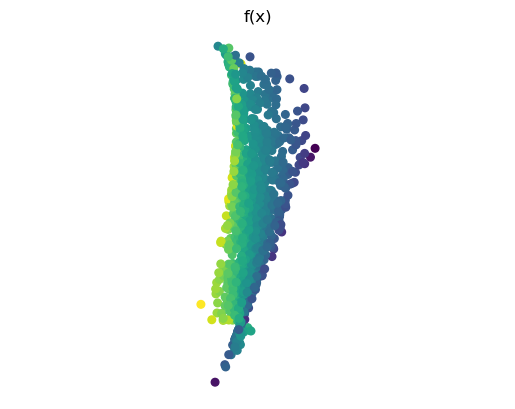

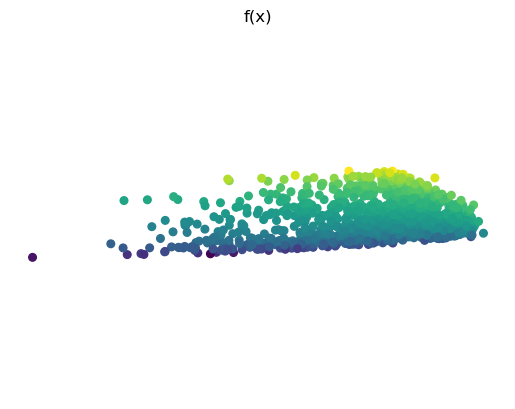

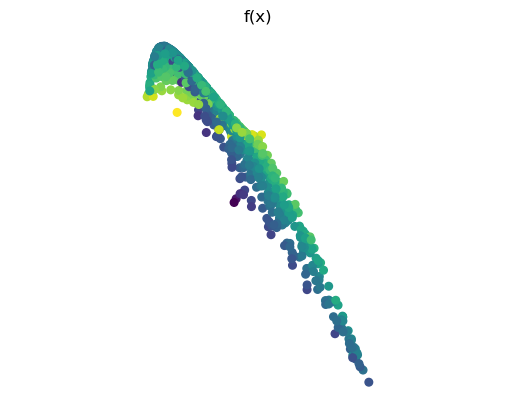

In [12]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(nn.Linear(2, n_hidden),
                        NL,
                        nn.Linear(n_hidden, n_hidden),
                        NL,
                        nn.Linear(n_hidden, n_hidden),
                        NL,
                        nn.Linear(n_hidden, n_hidden),
                        NL,
                        nn.Linear(n_hidden, 2))
    model.to(device)
    
    with torch.no_grad():
        Y = model(X)
        show_scatterplot(Y, colors, title='f(x)')